# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [157]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [158]:
#Load dataset
df = pd.read_csv(r'C:\Users\berna\lighthouse_data_notes\ml-project-unsupervised-learning\Wholesale_Data.csv')

In [159]:

#view dataset
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [160]:
#inspect dataset
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [161]:
# dataset description
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Channel,440,1,0,1,1,1,2,2
Region,440,3,1,1,2,3,3,3
Fresh,440,12000,12647,3,3128,8504,16934,112151
Milk,440,5796,7380,55,1533,3627,7190,73498
Grocery,440,7951,9503,3,2153,4756,10656,92780
Frozen,440,3072,4855,25,742,1526,3554,60869
Detergents_Paper,440,2881,4768,3,257,816,3922,40827
Delicassen,440,1525,2820,3,408,966,1820,47943


In [162]:
#view datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [163]:
#perform EDA
# from dataprep.eda import plot, plot_correlation, create_report, plot_missing
# plot(df)

<Figure size 800x500 with 0 Axes>

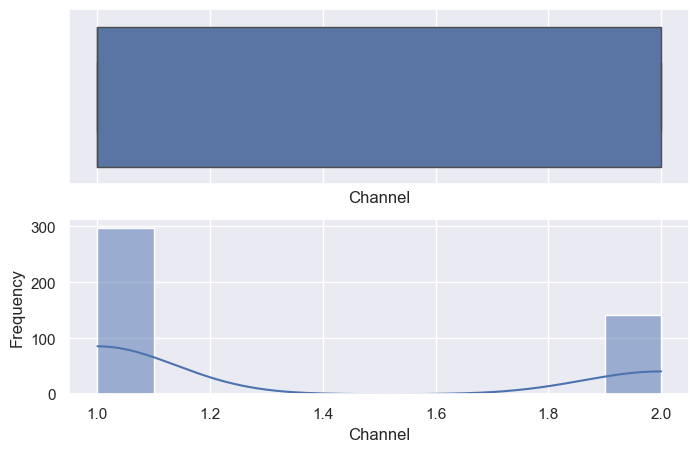

<Figure size 800x500 with 0 Axes>

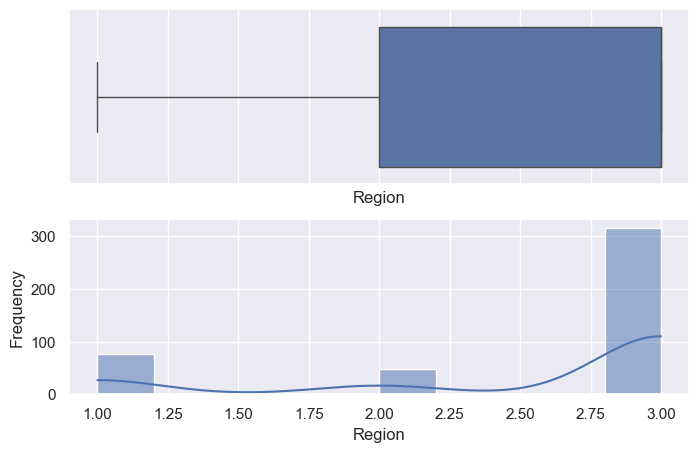

<Figure size 800x500 with 0 Axes>

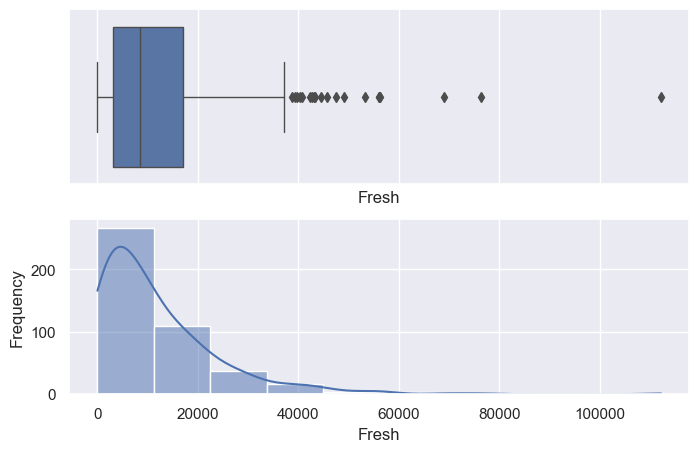

<Figure size 800x500 with 0 Axes>

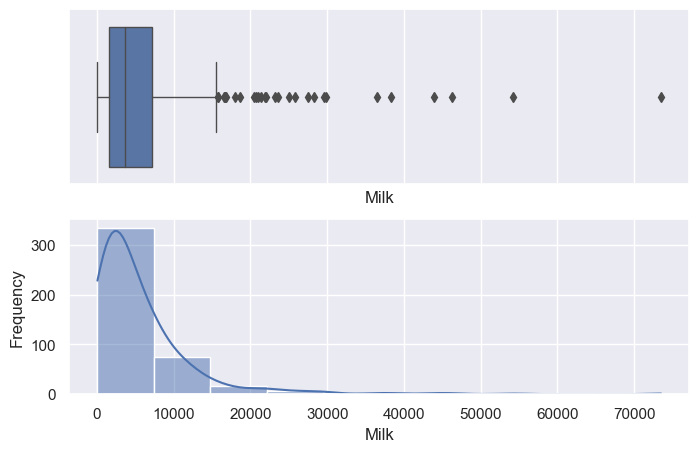

<Figure size 800x500 with 0 Axes>

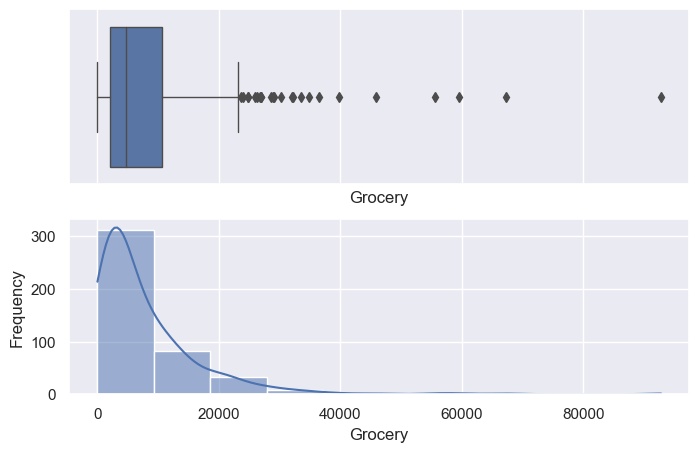

<Figure size 800x500 with 0 Axes>

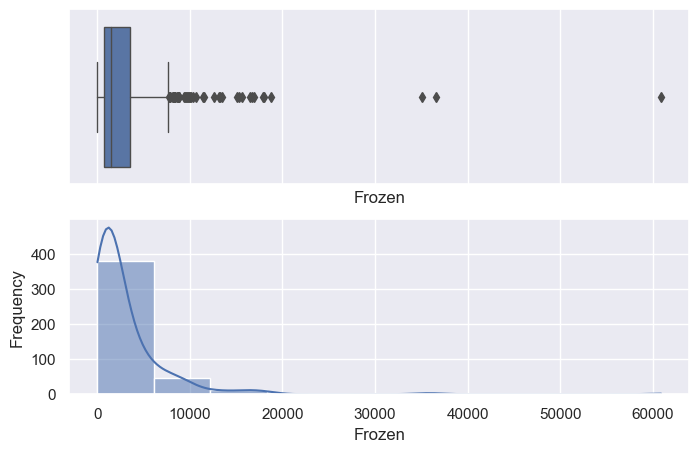

<Figure size 800x500 with 0 Axes>

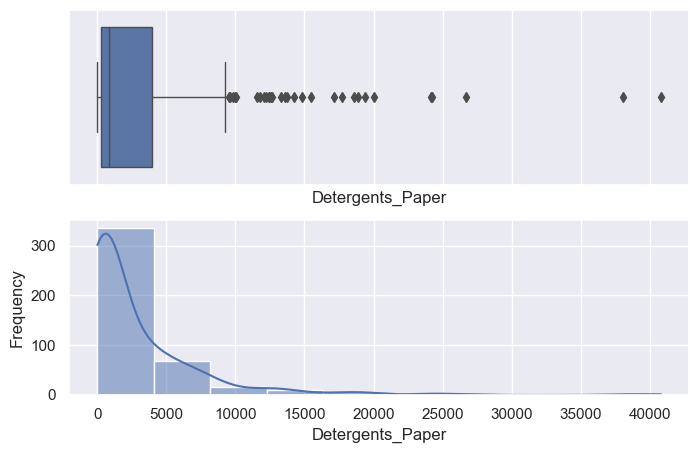

In [164]:
# Check if outliers are removed
for i in df.columns[0:-1]:
    #print(cols[columns])
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

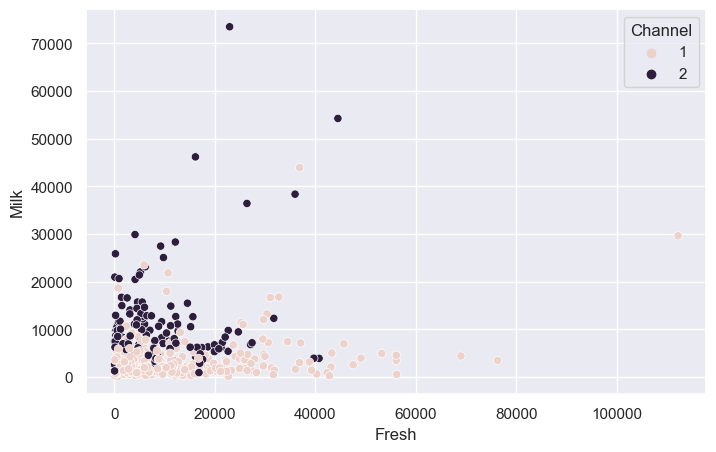

In [165]:
# display relationship between the Fresh, Milk and Channel variables
sns.scatterplot(x= "Fresh" ,y= "Milk",
              hue="Channel",
              data=df);

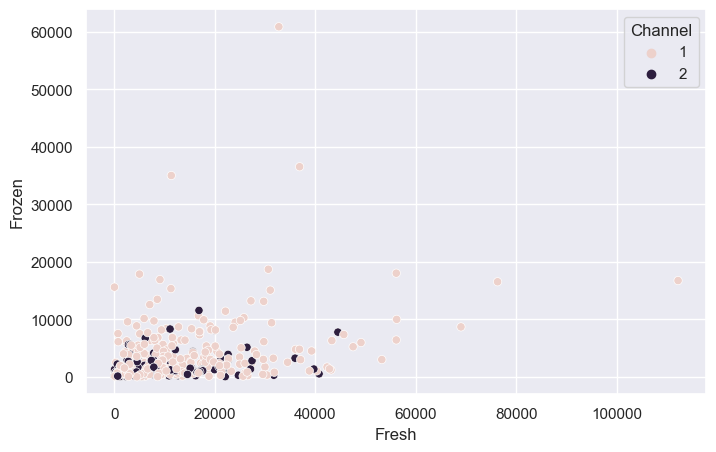

In [166]:
# display relationship between the Fresh, Frozen and Channel variables
sns.scatterplot(x= "Fresh" ,y= "Frozen",
              hue="Channel",
              data=df);

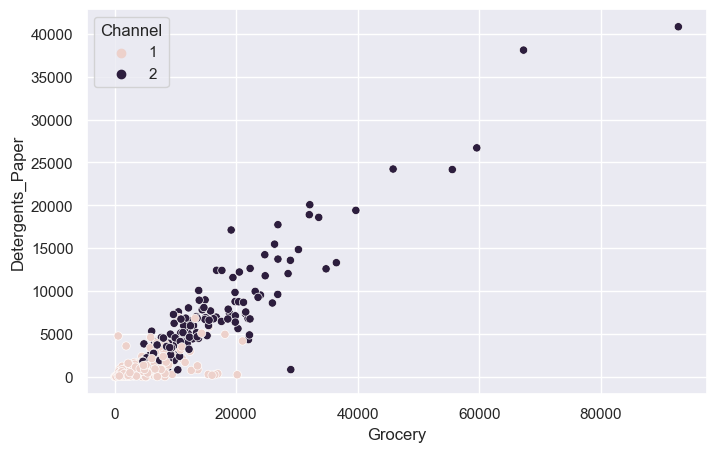

In [167]:
# display relationship between the Grocery, Detergents_paper and Channel variables
sns.scatterplot(x= "Grocery" ,y= "Detergents_Paper",
              hue="Channel",
              data=df);

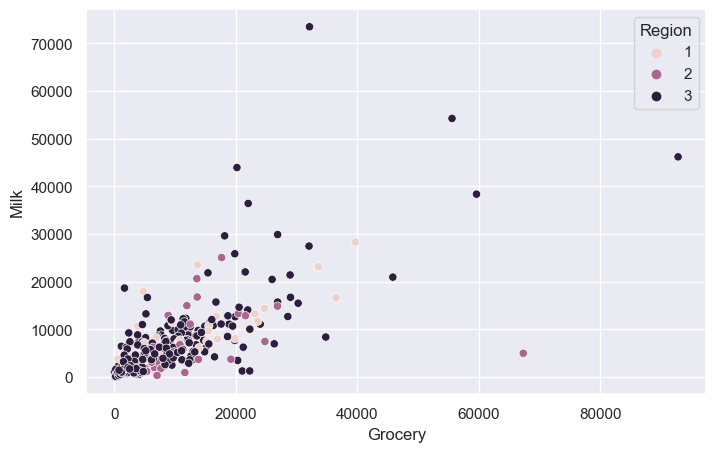

In [168]:
# display relationship between the Grocery, Milk and region variables
sns.scatterplot(x= "Grocery" ,y= "Milk",
              hue="Region",
              data=df);

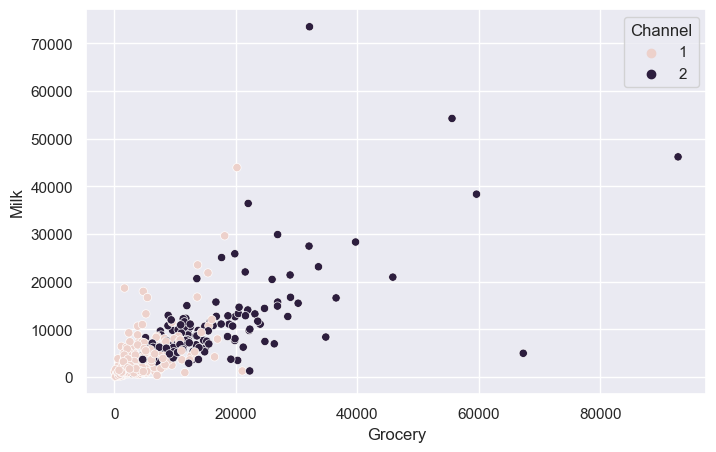

In [169]:
# display relationship between the Grocery, Milk and Channel variables
sns.scatterplot(x= "Grocery" ,y= "Milk",
              hue="Channel",
              data=df);

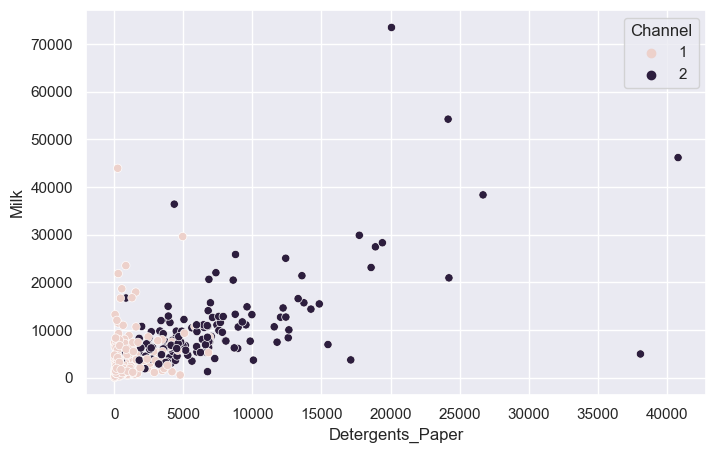

In [170]:
# display relationship between the Detergents paper, Milk and Channel variables
sns.scatterplot(x= "Detergents_Paper" ,y= "Milk",
              hue="Channel",
              data=df);

In [171]:
# identify and remove outliers
# Function to detect outliers
def detect_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = dataframe[(dataframe[column] < Q1 - 1.5*IQR) | (dataframe[column] > Q3 + 1.5*IQR)]
    return outliers

# Detect and print number of outliers for each feature
for column in df.columns:
    outliers = detect_outliers(df, column)
    print(f'Number of outliers in {column}: {len(outliers)}')

Number of outliers in Channel: 0
Number of outliers in Region: 0
Number of outliers in Fresh: 20
Number of outliers in Milk: 28
Number of outliers in Grocery: 24
Number of outliers in Frozen: 43
Number of outliers in Detergents_Paper: 30
Number of outliers in Delicassen: 27


In [172]:
def handle_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    dataframe[column] = dataframe[column].apply(lambda x: upper_limit if x > upper_limit else lower_limit if x < lower_limit else x)

# Handle outliers for each feature
for column in df.columns:
    handle_outliers(df, column)

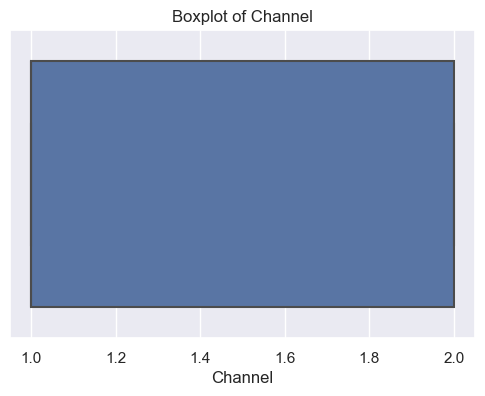

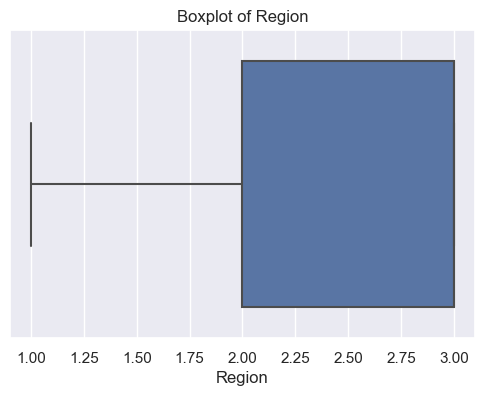

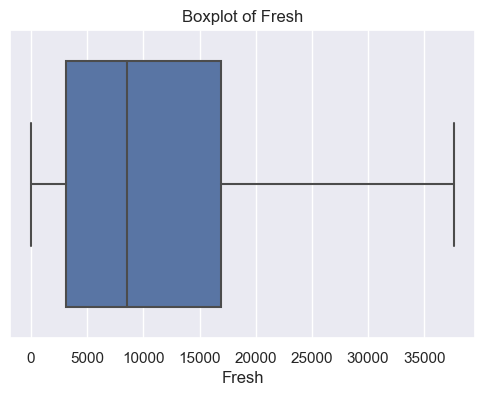

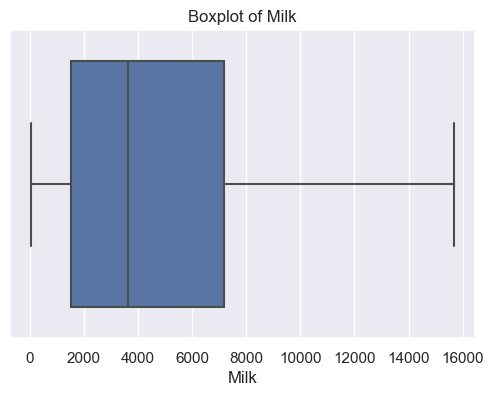

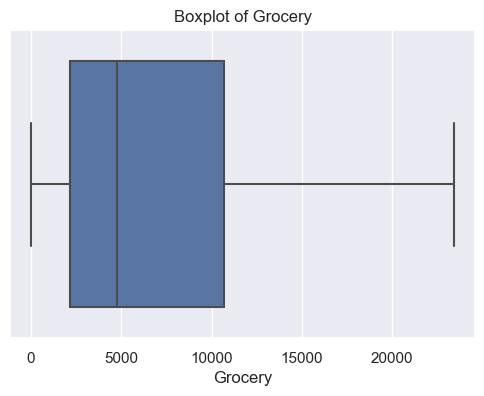

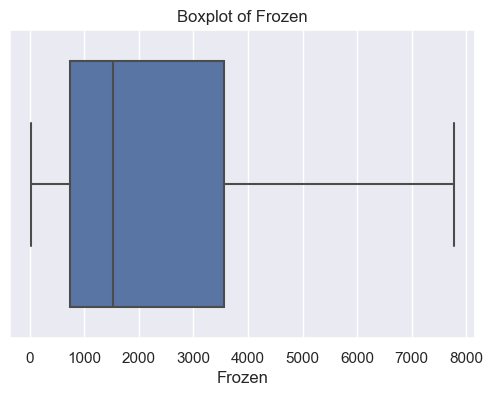

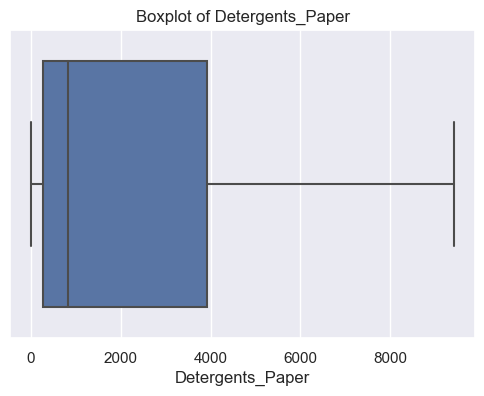

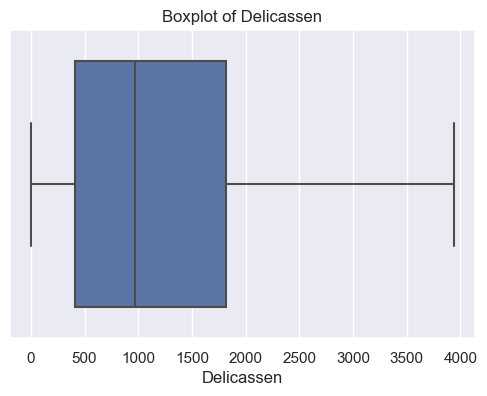

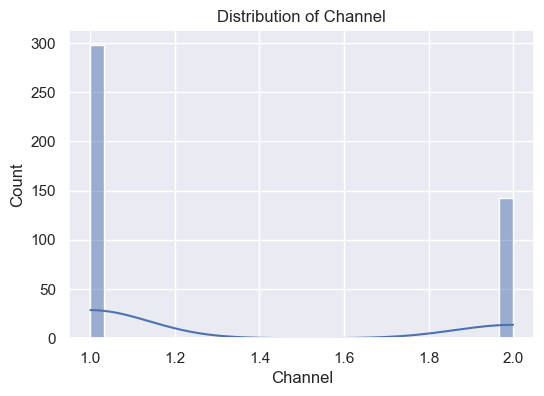

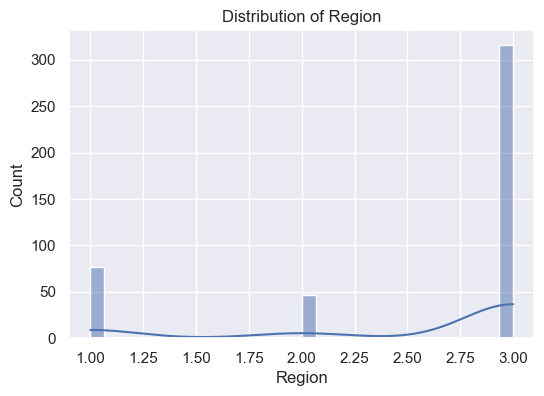

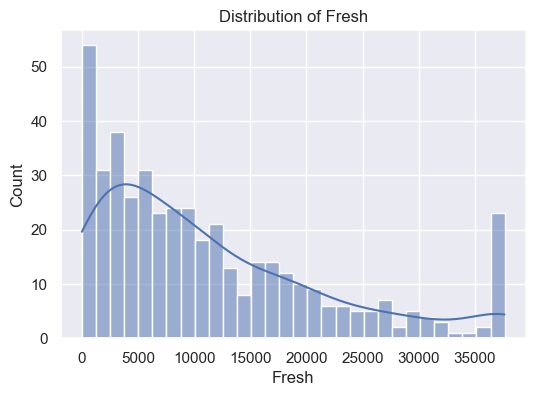

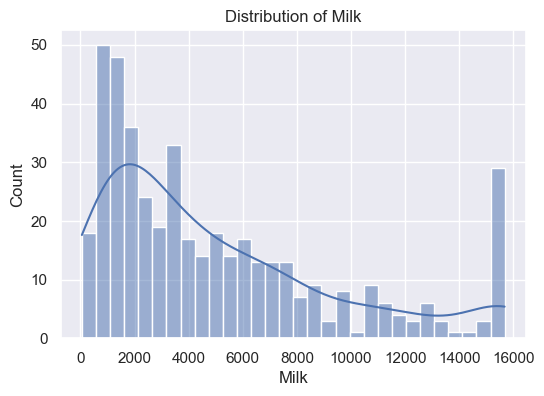

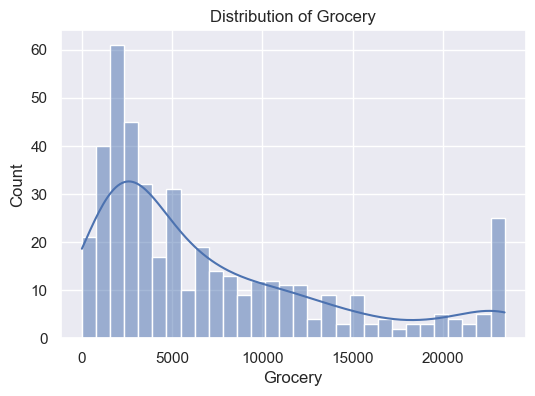

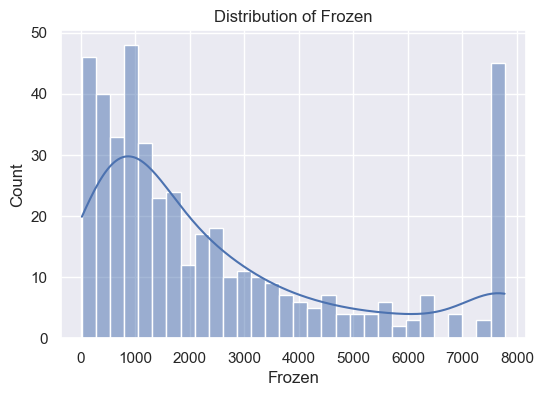

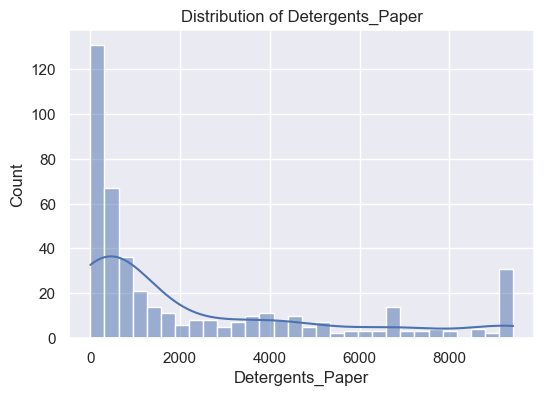

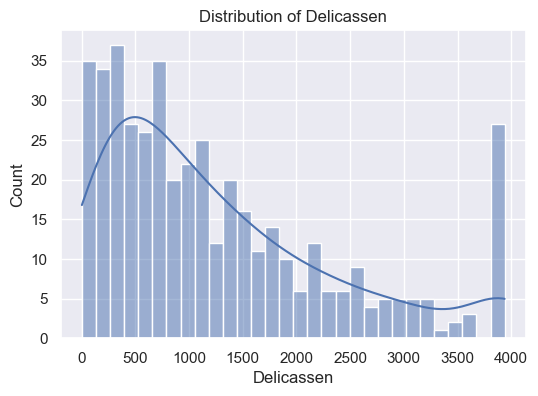

In [173]:
# Draw boxplots for all features
for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Draw distribution plots for all features
for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [174]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,3938
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,3938
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,7772,182,2204
436,1,3,37643,1431,764,4510,93,2346
437,2,3,14531,15488,23410,437,9420,1867
438,1,3,10290,1981,2232,1038,168,2125


In [175]:
# Function to detect outliers
def detect_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = dataframe[(dataframe[column] < Q1 - 1.5*IQR) | (dataframe[column] > Q3 + 1.5*IQR)]
    return outliers

# Detect and print number of outliers for each feature
for column in df.columns:
    outliers = detect_outliers(df, column)
    print(f'Number of outliers in {column}: {len(outliers)}')

Number of outliers in Channel: 0
Number of outliers in Region: 0
Number of outliers in Fresh: 0
Number of outliers in Milk: 0
Number of outliers in Grocery: 0
Number of outliers in Frozen: 0
Number of outliers in Detergents_Paper: 0
Number of outliers in Delicassen: 0


In [176]:
#correlation between variables
var = df.corr()
var

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1,0,-0,1,1,-0,1,0
Region,0,1,0,0,0,-0,0,0
Fresh,-0,0,1,-0,-0,0,-0,0
Milk,1,0,-0,1,1,-0,1,0
Grocery,1,0,-0,1,1,-0,1,0
Frozen,-0,-0,0,-0,-0,1,-0,0
Detergents_Paper,1,0,-0,1,1,-0,1,0
Delicassen,0,0,0,0,0,0,0,1


<AxesSubplot:>

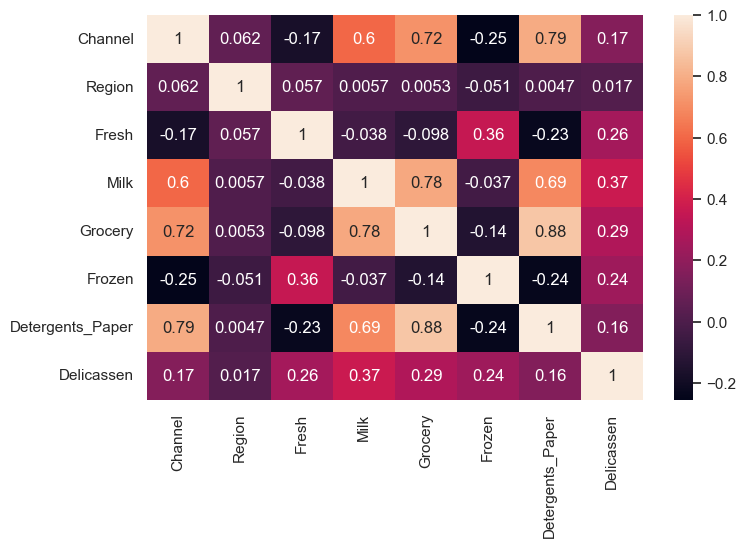

In [177]:
# display heatmap
sns.heatmap(var, annot=True)

In [178]:
# data transformation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

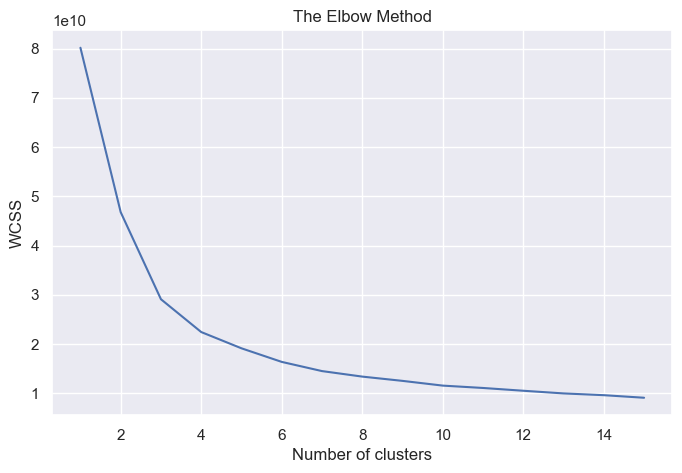

In [179]:
# Calculate WCSS for different number of clusters
from sklearn.cluster import KMeans

wcss = []
max_clusters = 15
for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, max_clusters+1), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [182]:
from sklearn.cluster import KMeans

# Build the model
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(df)



KMeans(n_clusters=4, random_state=42)

In [183]:
# predict clusters
clusters = kmeans.predict(df)
clusters

array([0, 1, 3, 0, 0, 3, 0, 3, 3, 1, 1, 0, 2, 0, 2, 3, 1, 3, 0, 3, 0, 3,
       2, 2, 2, 0, 3, 0, 1, 2, 0, 3, 0, 2, 3, 3, 2, 1, 1, 2, 2, 0, 1, 1,
       1, 1, 1, 2, 0, 1, 3, 3, 2, 1, 2, 3, 1, 1, 0, 3, 3, 2, 3, 1, 3, 1,
       3, 0, 3, 3, 0, 1, 3, 0, 3, 0, 3, 1, 0, 3, 3, 1, 1, 0, 0, 1, 1, 2,
       3, 2, 0, 0, 1, 0, 1, 3, 3, 3, 3, 3, 1, 1, 3, 2, 0, 0, 1, 1, 3, 1,
       0, 1, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 2, 2, 0, 0, 3, 2, 3, 3,
       0, 3, 3, 3, 3, 3, 0, 3, 0, 2, 2, 0, 0, 1, 3, 3, 3, 2, 0, 3, 0, 3,
       3, 1, 1, 0, 3, 1, 1, 0, 0, 1, 3, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 1,
       2, 0, 0, 3, 0, 2, 1, 2, 3, 3, 3, 3, 1, 1, 0, 0, 3, 1, 3, 0, 2, 1,
       0, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 1, 0, 1, 3, 3, 1, 1, 1, 0, 1, 3,
       0, 1, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 2, 3, 0, 3, 3, 0, 3, 2, 0, 0,
       0, 0, 1, 1, 3, 0, 0, 3, 3, 1, 3, 2, 0, 2, 0, 3, 2, 2, 3, 3, 0, 3,
       1, 1, 1, 0, 1, 0, 3, 3, 3, 2, 3, 3, 2, 3, 0, 0, 3, 0, 2, 2, 2, 2,
       3, 0, 0, 2, 3, 3, 3, 1, 0, 3, 0, 3, 3, 3, 0,

In [184]:
# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to your original dataframe
df['Cluster'] = cluster_labels

print(df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Cluster  
0        1338        0  
1        1776        1  
2        3938        3  
3        1788        0  
4        3938        0  


In [185]:
# view cluster distribution
pd.options.display.float_format = "{:.0f}".format
col = df.columns
summary=df[['Channel', 'Region','Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen',
       'Cluster']]
summary.set_index("Cluster", inplace = True)
summary=summary.groupby('Cluster').describe().transpose()
summary.head()

Cluster         0  1  2   3
Channel count 112 94 58 176
        mean    1  2  1   1
        std     0  0  0   0
        min     1  1  1   1
        25%     1  2  1   1

In [186]:
# Check the size of each cluster
print("Cluster Sizes:\n", df['Cluster'].value_counts())

# Check the characteristics of each cluster
for i in range(4):
    print("\nCluster ", i)
    print(df[df['Cluster'] == i].describe())

Cluster Sizes:
 3    176
0    112
1     94
2     58
Name: Cluster, dtype: int64

Cluster  0
       Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
count      112     112    112   112      112     112               112   
mean         1       3  16051  3136     4212    2989               995   
std          0       1   3764  2524     3150    2531              1246   
min          1       1  10379   134        3     118                 3   
25%          1       2  12420  1284     1970    1019               188   
50%          1       3  16195  2252     3203    2158               456   
75%          1       3  18830  4537     5700    4276              1404   
max          2       3  24929 15676    14982    7772              6707   

       Delicassen  Cluster  
count         112      112  
mean         1230        0  
std           964        0  
min            51        0  
25%           514        0  
50%           879        0  
75%          1804        0  
max      

In [187]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,3938,3
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,3938,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,7772,182,2204,2
436,1,3,37643,1431,764,4510,93,2346,2
437,2,3,14531,15488,23410,437,9420,1867,1
438,1,3,10290,1981,2232,1038,168,2125,3


In [188]:
# Calculate the mean values for each feature per cluster
cluster_means = df.groupby('Cluster').mean()

# Transpose the DataFrame so that the features are the rows (this will make plotting easier)
cluster_means = cluster_means.transpose()
print(cluster_means)


Cluster              0     1     2    3
Channel              1     2     1    1
Region               3     2     3    3
Fresh            16051  5332 32137 4741
Milk              3136 10454  5974 3074
Grocery           4212 17196  7309 3818
Frozen            2989  1496  4170 2192
Detergents_Paper   995  6937  1417 1176
Delicassen        1230  1547  1968  909


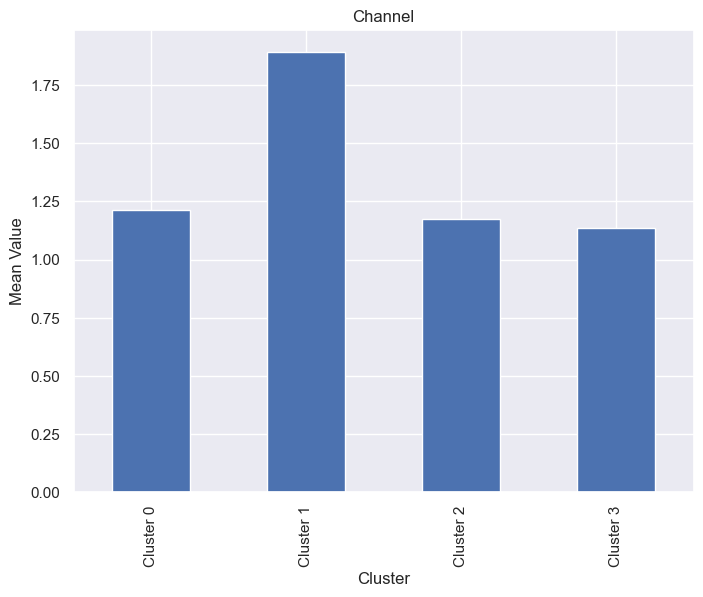

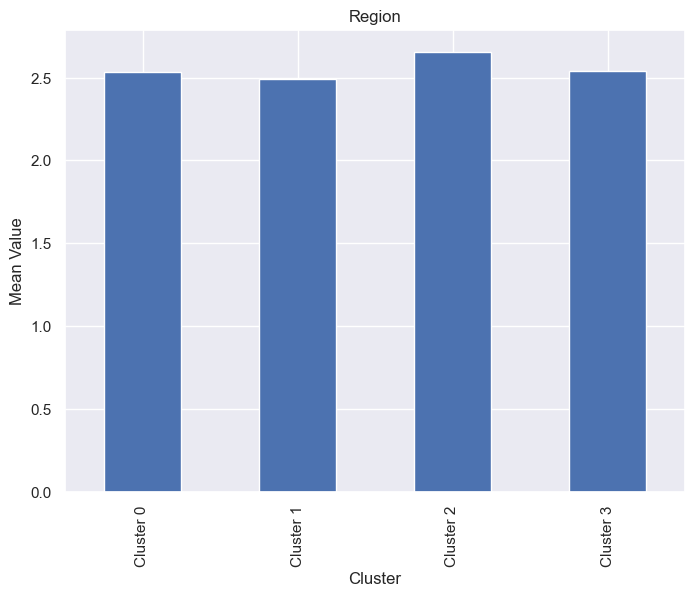

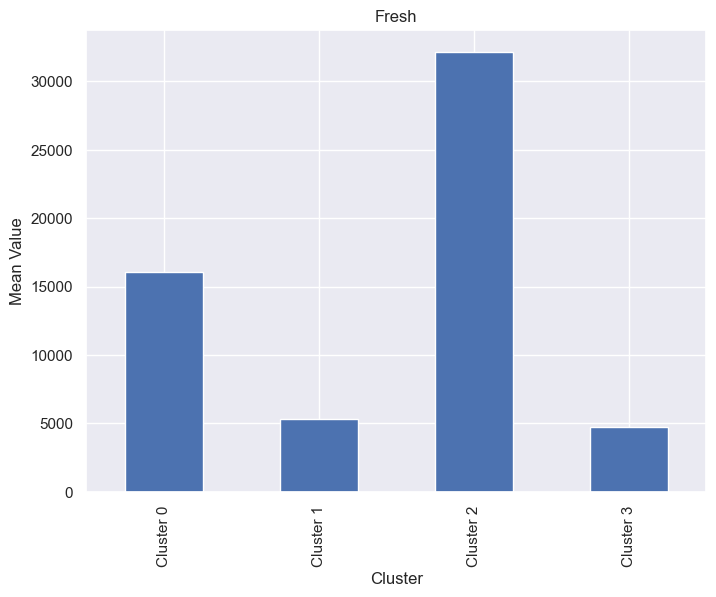

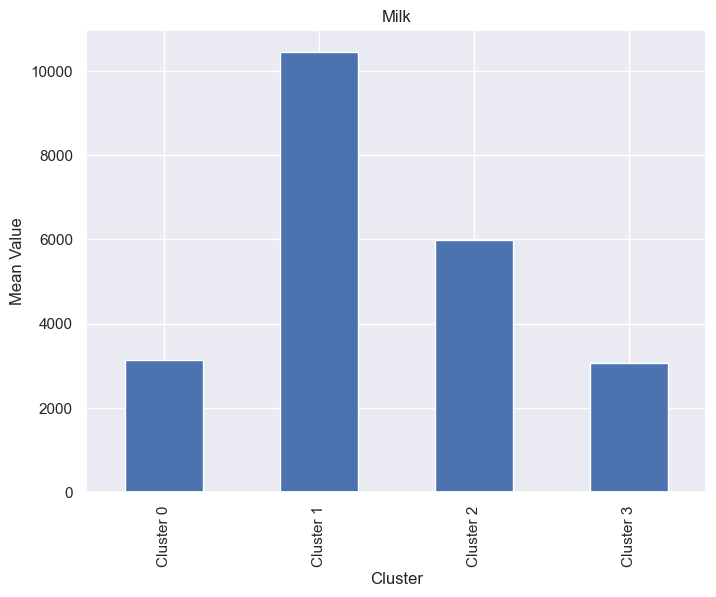

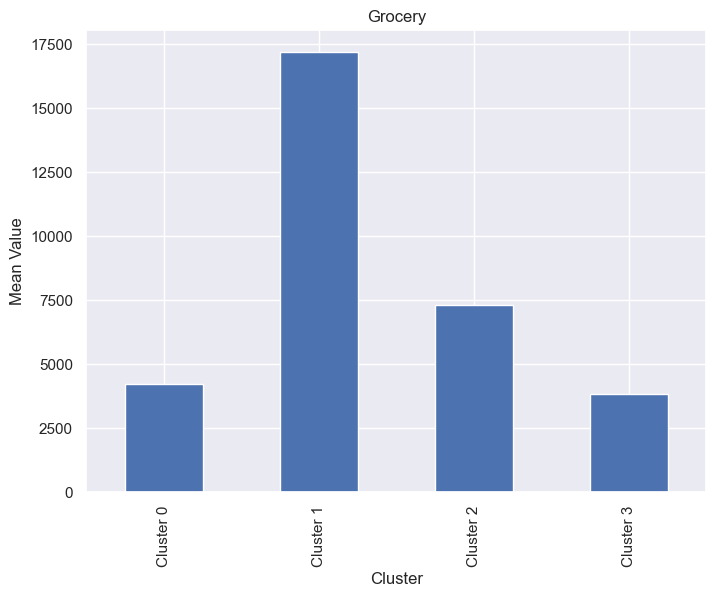

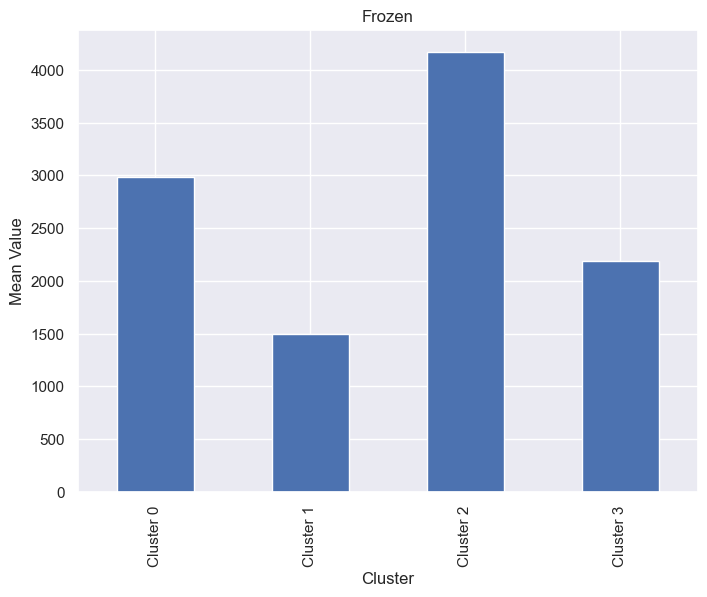

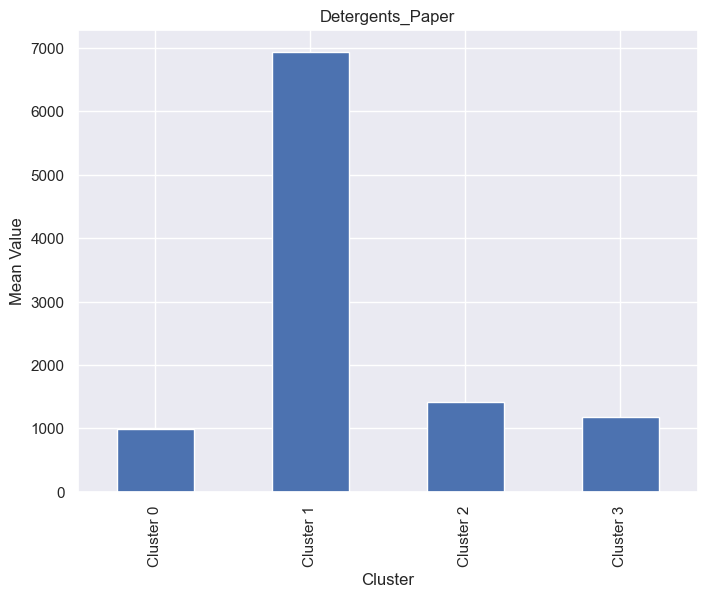

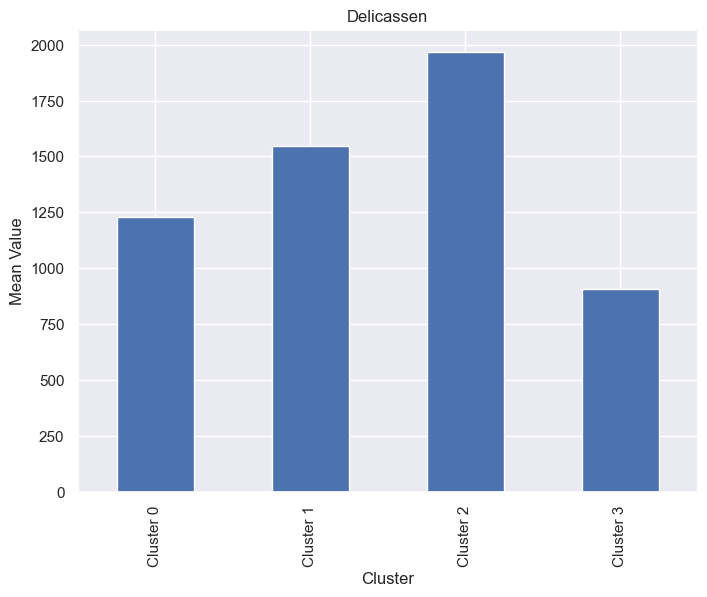

In [189]:
# Create bar plot for each feature
for feature in cluster_means.index:
    cluster_means.loc[feature].plot(kind='bar', figsize=(8,6))
    plt.title(feature)
    plt.ylabel('Mean Value')
    plt.xticks(ticks=range(4), labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
    plt.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [190]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,3938,3
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,3938,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,7772,182,2204,2
436,1,3,37643,1431,764,4510,93,2346,2
437,2,3,14531,15488,23410,437,9420,1867,1
438,1,3,10290,1981,2232,1038,168,2125,3


In [191]:
df.drop(columns=['Cluster'],axis=1, inplace=True)

In [ ]:
from sklearn.cluster import AgglomerativeClustering


cls_h = AgglomerativeClustering()
hrc = cls_h.fit(df)

In [ ]:
hrc.fit_predict(df)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [192]:
# define plot_dendrogram function
# cluster hierarchy
import scipy.cluster.hierarchy as sch
def plot_dendrogram(df,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(df, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()


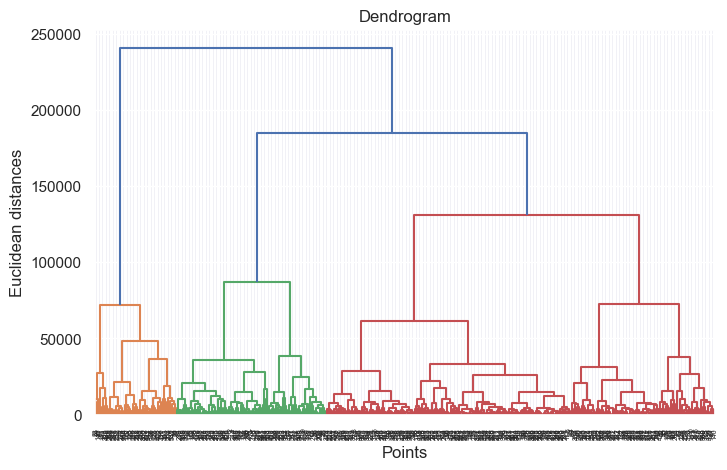

In [193]:
plot_dendrogram(df)

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [194]:
from sklearn.decomposition import PCA
# Apply PCA and fit the features selected
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)#.drop('Cluster', axis=1))


In [195]:
# Create a DataFrame with the two components
PCA_components = pd.DataFrame(principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

In [197]:

# Concatenate the clusters labels to the DataFrame
df['Cluster'] = cluster_labels
PCA_components['Cluster'] = df['Cluster']

In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,3938,3
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,3938,0


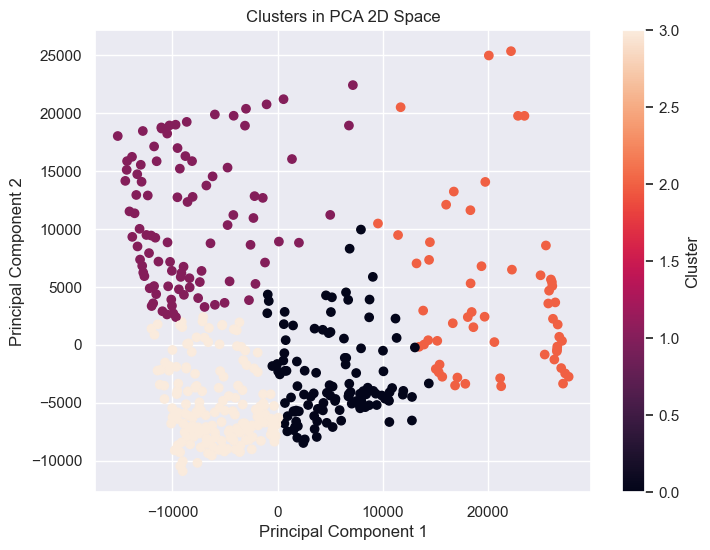

In [198]:
# Plot the clustered dataset
plt.figure(figsize=(8,6))
plt.scatter(PCA_components['Principal Component 1'], PCA_components['Principal Component 2'], c=PCA_components['Cluster'])
plt.title('Clusters in PCA 2D Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- Performing PCA on dataset for feature reduction yielded four clusters; 
1. Cluster 3 is the combination of products that falls around zero and negative. Stakeholders should consider promo or discount to encourage customers to engage in the purchase of those items.
2. Cluster 2 is the combination of products that are of high interest to customers, therefore, stakeholder should provide measure to retain this group and provide ways to increase their purchasing activities.
- Right Skewness: Features such as 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', and 'Delicassen' show a right skew (mean > median). This could impact the performance of some machine learning algorithms.
- combination of Milk and detergents paper/Grocery shows a positive linear relationship with channel 2 and region 3 playing a significant part.
- There is a very strong Relationship between the Grocery, Detergents_paper and Channel variables
- The Hierarchical Cluster shows two clusters based on agglomerative clustering.
